In [14]:
import numpy as np
import pandas as pd
x_dt = pd.read_csv('train.csv')

In [2]:
total_data_number = x_dt.shape[0]
feature_num = x_dt.shape[1]

In [3]:
x_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# pre-processing 
# firstly, clearly the 'passengerid' and 'passengername' are irrelavant to whether they survive
# also the 'ticket number' can't denote their class and bad in evaluation
# so i would like to delete these these three cols
x_dt = x_dt.drop(labels=['PassengerId','Name','Ticket'], axis=1)

In [5]:
# convert sex into 0 or 1
# convert Embarked into 1,2,3
x_dt.loc[x_dt['Sex'] == 'male','Sex'] = 1
x_dt.loc[x_dt['Sex'] == 'female','Sex'] = 0
x_dt.loc[x_dt['Embarked'] == 'Q','Embarked'] = 1
x_dt.loc[x_dt['Embarked'] == 'S','Embarked'] = 2
x_dt.loc[x_dt['Embarked'] == 'C','Embarked'] = 3

In [6]:
# and clearly we can see the there are seems a lot of missing data in different features
# so lets count the number of missing data.
nan_num = x_dt.isna().sum()
print(nan_num)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [7]:
# from the chart above, the percentage of missing data for Cabin feature is 687/891 , very high. 
# so the feature is useless, its better to delete it
x_dt = x_dt.drop(labels=['Cabin'], axis=1)

In [8]:
# So from the above four graph that the age is well distributed without any linear relationship between other feastures
# its very hard to predic these 177 missing data. its so better to just delete plus two data with missing Embarked
X = x_dt.dropna(axis=0, how='any').copy()

In [9]:
# change all data type into number
X = X.astype(float)

In [10]:
# reset an split
X = X.reset_index(drop=True)
n_x = X.shape[0]
train_num = int(0.8* n_x)
test_num = n_x-train_num

rand_indices = np.random.permutation(n_x)
train_indices = rand_indices[0:train_num]
test_indices = rand_indices[train_num:n_x]

x_train = X.iloc[train_indices][['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x_test = X.loc[test_indices][['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train = X.loc[train_indices]['Survived']
y_test = X.loc[test_indices]['Survived']

# re-index
x_train = x_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(569, 7)
(143, 7)
(569,)
(143,)


In [29]:
# use AdaBoostClassifier function from sklearn package
from sklearn.ensemble import AdaBoostClassifier

train_err_list = []
test_err_list = []

for i in range(1,501):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(x_train, y_train) 
    err_tr = 1-clf.score(x_train,y_train)   #error_rate = 1 - accuracy
    err_test = 1-clf.score(x_test,y_test)   #error_rate = 1 - accuracy
    train_err_list.append(err_tr)
    test_err_list.append(err_test)




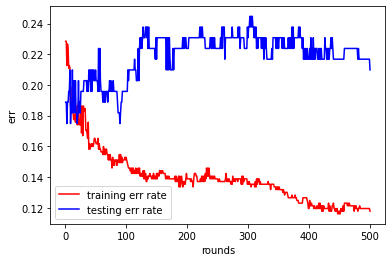

In [30]:
# plot the lost function on training data and validation data
import matplotlib.pyplot as plt
%matplotlib inline



rounds = range(1,501)

plt.plot(rounds, train_err_list, 'r', label='training err rate')
plt.plot(rounds, test_err_list, 'b', label='testing err rate')
plt.xlabel('rounds')
plt.ylabel('err')
plt.legend()
plt.show()

In [34]:
min_test_err_rate = min(test_err_list)
print("best accuracy on the test data is:",1-min_test_err_rate)


best accuracy on the test data is: 0.8251748251748252


In [ ]:
# AdaBoost is a learning sequential-process
# For each round, model can learn something from the previous round, so the model is easy to be overfitting
# Round number can't be so large
# AdaBoost is a better model than decision tree with  about 2-3% accuracy improvement in this dataset.